# Multidimensional data in pandas

Files needed = (dogs.csv, WEOOct2016all.xls)

We have covered some pandas basics and learned how to plot. Now let's sort out how to deal with more complex data. We will often find ourselves with data in which the unit of observation is complex. Pandas helps us deal with this by allowing for many index variables. So far, we have only used single indexing, but that is about to change. 

Some examples that could use a multiIndex
1. State and country
2. Team and player
3. Industry and firm
4. Country (or person, firm,...) and time

That last one is important, and one that shows up a lot in economics. We call is *panel data*. Panel data is sometimes called longitudinal data. It follows the same firm/person/country over time. 

In [64]:
import pandas as pd                 # load pandas and shorten it to pd
import datetime as dt               # load datetime and shorten it to dt
import matplotlib.pyplot as plt     # for making figures
import numpy as np
import matplotlib.ticker as ticker

In [2]:
soccer = {'team' : ['Man City', 'Man City', 'Man City', 'Man City', 'Chelsea', 'Chelsea'], 
          'player' : ['Walker', 'Stones', 'Foden', 'Jesus', 'Cahill', 'Pedro'],
          'pos' : ['D', 'D', 'M', 'F', 'D', 'F'],
          'goals' : [1, 0, 0, 1, 0, 3],
          'assists': [0,0,0,0,0,0]
         }

prem = pd.DataFrame(soccer)
prem

,team,player,pos,goals,assists
0,Man City,Walker,D,1,0
1,Man City,Stones,D,0,0
2,Man City,Foden,M,0,0
3,Man City,Jesus,F,1,0
4,Chelsea,Cahill,D,0,0
5,Chelsea,Pedro,F,3,0


### Multiple indexing
The key to working with more complex datasets is getting the index right. So far, we have considered a single index, but pandas allows for multiple indexes that nest each other. 

**Key concept:** Hierarchical indexing takes multiple *levels* of indexes. 

Let's set up the DataFrame to take team and position as the indexes. 

In [3]:
prem.set_index(['team', 'pos'], inplace=True)
prem

player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0
         M     Foden      0        0
         F     Jesus      1        0
Chelsea  D    Cahill      0        0
         F     Pedro      3        0

Wow. 

Notice that the `set_index()` method is the same one we used early with single indexes. In this case, we passed it a list of variables to make the indexes
```python
prem.set_index(['team', 'pos'], inplace=True)
```

In the output, the highest level of the index is team (we passed it 'team' first in the list) and the second level is position. The output does not repeat the team name for each observation. The 'missing' team name just mean that the team is the same as above. \[A very Tufte-esque removal of unnecessary ink.\] 

Let's take a look under the hood. What's our index? A new kind of object: the MultiIndex

In [4]:
print(prem.index)

MultiIndex(levels=[['Chelsea', 'Man City'], ['D', 'F', 'M']],
           labels=[[1, 1, 1, 1, 0, 0], [0, 0, 2, 1, 0, 1]],
           names=['team', 'pos'])


### Subsetting with multiple indexes
With a multi index, we need two arguments to reference observations

In [5]:
# All the defenders on Man City
prem.loc[('Man City', 'D'),:] 

/Users/travis/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0

It's always a good idea to pay attention to warnings, particularly 'PerformanceWarning'. Pandas is telling us that we are asking for something in the second index, but the second index is not ordered. If the index was big, this could slow down our program. Let's fix that with `sort_index()`.

**Important** Sort your mulitIndex. 

In [6]:
prem = prem.sort_index(axis=0)   # tell pandas which axis to sort. Could sort the columns, too...
                                 # returns a DataFrame unless we use inplace=True
prem

player  goals  assists
team     pos                        
Chelsea  D    Cahill      0        0
         F     Pedro      3        0
Man City D    Walker      1        0
         D    Stones      0        0
         F     Jesus      1        0
         M     Foden      0        0

In [7]:
# Now let's ask for all the defenders on Man City
prem.loc[('Man City', 'D'), :]

player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0

No warnings. 

### Partial indexing
With the indexes set, we can easily subset the data using only one of the indexes. In pandas, this is called *partial indexing* because we are only using part of the index to subset identify the data we want. 

We can use `loc[]` like we do with a single index if we want to index on the top level index.

In [8]:
print(prem.loc['Chelsea'])               # All the 'Chelsea' observations
print('\n')
print(prem.loc['Man City'])              # All the 'Man City' observations

     player  goals  assists
pos                        
D    Cahill      0        0
F     Pedro      3        0


     player  goals  assists
pos                        
D    Walker      1        0
D    Stones      0        0
F     Jesus      1        0
M     Foden      0        0


#### The xs() method
We can also use the `xs()` method. Here we specify which level we are looking into. Note that I can reference the levels either by an integer or by its name.

In [9]:
print(prem.xs('Chelsea', level = 0) )              # All the 'Chelsea' observations
print('\n')
print(prem.xs('Man City', level = 'team'))              # All the 'Man City' observations

     player  goals  assists
pos                        
D    Cahill      0        0
F     Pedro      3        0


     player  goals  assists
pos                        
D    Walker      1        0
D    Stones      0        0
F     Jesus      1        0
M     Foden      0        0


We can partially index on the 'inner index' as well. Suppose we want all the defenders, regardless of team.

In [10]:
prem.xs('D', level=1)

,player,goals,assists
team,,,
Chelsea,Cahill,0,0
Man City,Walker,1,0
Man City,Stones,0,0


As before, we can get rid of the index and replace it with a generic list of integers...

In [11]:
prem.reset_index(inplace=True)    # this moves the indexes back to columns
prem

,team,pos,player,goals,assists
0,Chelsea,D,Cahill,0,0
1,Chelsea,F,Pedro,3,0
2,Man City,D,Walker,1,0
3,Man City,D,Stones,0,0
4,Man City,F,Jesus,1,0
5,Man City,M,Foden,0,0


...and reset it with three levels of indexes!

In [12]:
prem.set_index(['team', 'player', 'pos'], inplace=True)
prem

goals  assists
team     player pos                
Chelsea  Cahill D        0        0
         Pedro  F        3        0
Man City Walker D        1        0
         Stones D        0        0
         Jesus  F        1        0
         Foden  M        0        0

#### A multiIndex in columns
There is nothing that says you can't have multiple indexes in the axis=1 dimension. Here is quick way to see this: transpose the DataFrame.

In [13]:
prem = prem.transpose()           # this swaps the rows for columns
print(prem)                       # print() lines up the columns well

team    Chelsea       Man City                   
player   Cahill Pedro   Walker Stones Jesus Foden
pos           D     F        D      D     F     M
goals         0     3        1      0     1     0
assists       0     0        0      0     0     0


Now the rows are named 'goals' and 'assists' and the columns are (team, player, pos). I'm not sure this is a very useful way to look at this particular dataset, but multiIndex columns can come in handy. Let's change it back.

In [14]:
prem = prem.transpose()
prem

goals  assists
team     player pos                
Chelsea  Cahill D        0        0
         Pedro  F        3        0
Man City Walker D        1        0
         Stones D        0        0
         Jesus  F        1        0
         Foden  M        0        0

### Summary statistics by level
MultiIndexes provide a quick way to summarize data. We will see many different ways to do this --- getting statistics by group --- and not all will involve a multiIndex. 

In [15]:
prem.sort_index(axis = 0, inplace = True)
# When subsetting by the upppermost level, I can use xs or loc
print('Chelsea avg. goals', prem.xs('Chelsea', level='team')['goals'].mean())   # average goals for Chelsea players
print('Chelsea avg. goals', prem.loc['Chelsea','goals'].mean())   # average goals for Chelsea players

# When subsetting on the inner levels, I use xs 
print('Defender avg. goals {0:.2f}.'.format( prem.xs('D', level='pos')['goals'].mean() ) )          # average goals for defenders

Chelsea avg. goals 1.5
Chelsea avg. goals 1.5
Defender avg. goals 0.33.


Notice the syntax with xs.
```python
 prem.xs('Chelsea', level='team')['goals']
```

The `prem.xs('Chelsea', level='team')` is returning a DataFrame with all the columns. 

We then use the usual square-bracket syntax to pick off just the column 'goals' and then hit with `mean()`


### Saving multiIndex DataFrames
Saving a multiIndexed DataFrame works like before. Pandas fills in all the repeated labels to the output is ready to go. Run the following code and then open the csv files.

In [16]:
# Multiple indexes on rows
prem.to_csv('prem.csv')

# Multiple indexes on columns
prem = prem.transpose()
prem.to_csv('prem_transposed.csv')

## Practice

Let's redo question \#3 on the exam using multiIndexes.  

1. Load the march cps data, 'CPS_March_2016.csv'. Remember, missing values are '.'

In [17]:
cps = pd.read_csv("CPS_March_2016.csv", na_values = ".")
cps.head()

,hrwage,educ,female,fulltimely
0,20.961538,Some college,0,1.0
1,20.192308,HS diploma/GED,1,1.0
2,6.410256,Some college,0,0.0
3,NaN,Less than HS,0,NaN
4,NaN,Some college,0,NaN


2. Keep only those with `fulltimely == 1`
3. Keep only those with `5 <= hrwage <= 200`

In [18]:
cps.drop(cps[cps.fulltimely != 1].index, axis = 0, inplace = True)
cps.drop(cps[(5 > cps.hrwage) & (cps.hrwage > 200)].index, axis = 0, inplace = True)
cps.head()

,hrwage,educ,female,fulltimely
0,20.961538,Some college,0,1.0
1,20.192308,HS diploma/GED,1,1.0
6,14.285714,HS diploma/GED,1,1.0
10,18.269230,Some college,1,1.0
12,59.523810,Graduate degree,0,1.0


4. Rename 'female' to 'sex'
5. In column 'sex' replace 0 with 'male' and 1 with 'female'

In [19]:
cps.rename(columns = {"female":"sex"}, inplace = True)
cps.loc[cps.sex == 1, "sex"] = "female"
cps.loc[cps.sex == 0, "sex"] = "male"
cps.head()

,hrwage,educ,sex,fulltimely
0,20.961538,Some college,male,1.0
1,20.192308,HS diploma/GED,female,1.0
6,14.285714,HS diploma/GED,female,1.0
10,18.269230,Some college,female,1.0
12,59.523810,Graduate degree,male,1.0


6. Set the index to 'sex' and 'educ', in that order.
7. Sort the index. 

In [20]:
cps.set_index(["sex", "educ"], inplace = True)
cps.sort_index(axis = 0, inplace = True)
cps.head()

hrwage  fulltimely
sex    educ                                 
female College degree  18.367348         1.0
       College degree  22.349272         1.0
       College degree  18.269230         1.0
       College degree  43.269230         1.0
       College degree  19.230770         1.0

8. Report the average wage for males and females. Try it with the `loc[]` method. 

In [21]:
male_avgwage = round(cps.loc["male", "hrwage"].mean(), ndigits = 2)
female_avgwage = round(cps.loc["female", "hrwage"].mean(), ndigits = 2)
print("Male's average wage is", male_avgwage, "dollars.")
print("Female's average wage is", female_avgwage, "dollars.")

Male's average wage is 28.04 dollars.
Female's average wage is 22.54 dollars.


9. Report the average wage for `HS diploma/GED` and for `College degree`, regardless of sex. Use the `xs()` method.  

In [22]:
hs_avgwage = round(cps.xs("HS diploma/GED", level = 1)["hrwage"].mean(), ndigits = 2)
col_avgwage = round(cps.xs("College degree", level = 1)["hrwage"].mean(), ndigits = 2)
print("Average wage for people with HS diploma/GED is", hs_avgwage, "dollars.")
print("Average wage for people with College degree is", col_avgwage, "dollars.")

Average wage for people with HS diploma/GED is 18.46 dollars.
Average wage for people with College degree is 32.09 dollars.


## Panel data
Panel data have (at least) three dimensions, for example, a panel might record
1. several variables (income, age, spending on cheese)
2. regarding several people
3. over time

The multiIndex gives us a natural way to handle this data. 

In [23]:
# load a data file with the number of walks and snacks my dogs have had 
dogs = pd.read_csv('dogs.csv')         # data on the habits of my dogs
dogs


,dog,var,time,value
0,Buster,walk,10/1/2018,2
1,Buster,walk,10/2/2018,2
2,Buster,walk,10/3/2018,1
3,Buster,snacks,10/1/2018,4
4,Buster,snacks,10/2/2018,3
5,Buster,snacks,10/3/2018,4
6,Buster,snacks,10/4/2018,5
7,Su,walk,10/1/2018,2
8,Su,walk,10/2/2018,2
9,Su,walk,10/3/2018,2


This data format is called **long** because there are lots of rows and not many columns. Moving between long and **wide** (lots of columns, fewer rows) is a common task in setting up panel data sets. 

Pandas calls long data **stacked** and wide data **unstacked**. We use the `stack()` and `unstack()` methods for moving between long and wide with multiIndexed data. Stack and unstack do not work in place. They always return a copy, so we need to assign it to variables.

In [24]:
dogs['time'] = pd.to_datetime(dogs['time'])

# move everything but the data values to the index
dogs = dogs.set_index(['dog', 'time', 'var'])
dogs

value
dog    time       var          
Buster 2018-10-01 walk        2
       2018-10-02 walk        2
       2018-10-03 walk        1
       2018-10-01 snacks      4
       2018-10-02 snacks      3
       2018-10-03 snacks      4
       2018-10-04 snacks      5
Su     2018-10-01 walk        2
       2018-10-02 walk        2
       2018-10-03 walk        2
       2018-10-01 snacks      3
       2018-10-02 snacks      4
       2018-10-03 snacks      4
       2018-10-04 snacks      3

### Unstack
We **unstack the data** to put the variables into columns. 

In [25]:
dogs_us = dogs.unstack('var') # move var to columns creates a multiindex with two levels
dogs_us


value     
var               snacks walk
dog    time                  
Buster 2018-10-01    4.0  2.0
       2018-10-02    3.0  2.0
       2018-10-03    4.0  1.0
       2018-10-04    5.0  NaN
Su     2018-10-01    3.0  2.0
       2018-10-02    4.0  2.0
       2018-10-03    4.0  2.0
       2018-10-04    3.0  NaN

We can unstack several variables. As usual, we pass a list. 

In [26]:
dogs_us = dogs.unstack(['dog', 'var']) # move dog and var to columns, creates a multiindex with three levels
dogs_us

value                   
dog        Buster          Su       
var          walk snacks walk snacks
time                                
2018-10-01    2.0    4.0  2.0    3.0
2018-10-02    2.0    3.0  2.0    4.0
2018-10-03    1.0    4.0  2.0    4.0
2018-10-04    NaN    5.0  NaN    3.0

### Removing a level
The outermost level of the column multiIndex is 'value' and is not very useful. Let's drop it.

In [27]:
dogs_us.columns = dogs_us.columns.droplevel(level = 0)
dogs_us

dog        Buster          Su       
var          walk snacks walk snacks
time                                
2018-10-01    2.0    4.0  2.0    3.0
2018-10-02    2.0    3.0  2.0    4.0
2018-10-03    1.0    4.0  2.0    4.0
2018-10-04    NaN    5.0  NaN    3.0

We now have an unstacked DataFrame and each column is a time series of one dog's observations (the data are 'wide'). 
Notice that we do not have observations for Thursday's walks, so panda filled in NaNs for us. 

Panel data like this are STATA's bread and butter, and STATA has a lot of tools for working with panels. Pandas does not have as large a toolset, but the multiIndex provides a very nice way to handle and display panel data. STATA does not have a multiIndex, so the column names in the data above would be: 'walkBuster' 'snacksBuster' 'walkSu' 'snacksSu'. 

### Creating new variables
I want to know the walk-to-snacks ratio to make sure they are getting enough exercise. 

In [28]:
# compute the ratios
dogs_us[('Buster', 'ws_ratio')] =  dogs_us[('Buster', 'walk')]/dogs_us[('Buster', 'snacks')]
dogs_us[('Su', 'ws_ratio')] =  dogs_us[('Su', 'walk')]/dogs_us[('Su', 'snacks')]

# resort the index
dogs_us.sort_index(axis=1, inplace=True)
dogs_us


dog        Buster                    Su               
var        snacks walk  ws_ratio snacks walk  ws_ratio
time                                                  
2018-10-01    4.0  2.0  0.500000    3.0  2.0  0.666667
2018-10-02    3.0  2.0  0.666667    4.0  2.0  0.500000
2018-10-03    4.0  1.0  0.250000    4.0  2.0  0.500000
2018-10-04    5.0  NaN       NaN    3.0  NaN       NaN

Let's plot the walk-snack ratio. There are several things in this code to talk about...

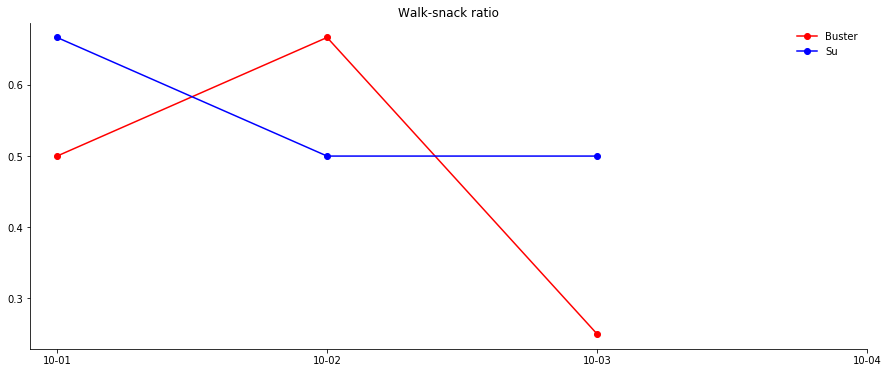

In [29]:
import matplotlib.dates as mdates
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(dogs_us.index, dogs_us[('Buster', 'ws_ratio')], color='red', marker = 'o', label='Buster')
ax.plot(dogs_us.index, dogs_us[('Su', 'ws_ratio')], color='blue', marker = 'o', label='Su')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Walk-snack ratio')
ax.legend(frameon=False)

# Here I am formatting the x-axis dates
ax.set_xticks(dogs_us.index)                                  # put ticks only where we have observations
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))   #show the month and day

plt.show()

#ax.plot(dogs_us.index, dogs_us.xs('ws_ratio', level=1, axis=1))
#ax.legend(dogs_us.columns.get_level_values(level='dog').unique())

In [30]:
# Here is get_level_values
dogs_us.columns.get_level_values(level='dog')

Index(['Buster', 'Buster', 'Buster', 'Su', 'Su', 'Su'], dtype='object', name='dog')

### An aside on datetime axes
I am exerting some control over the x-axis ticks and labels here. 
```python
ax.set_xticks(dogs_us.index)   
```
specifies that I want ticks at the values in the index --- and only at these places.

The code
```python 
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
```
tells matplotlib to format the tick labels as month-day. To use this second line of code, I needed to import the mdates (**m**atplotlib **dates**) part of the matplotlib package.

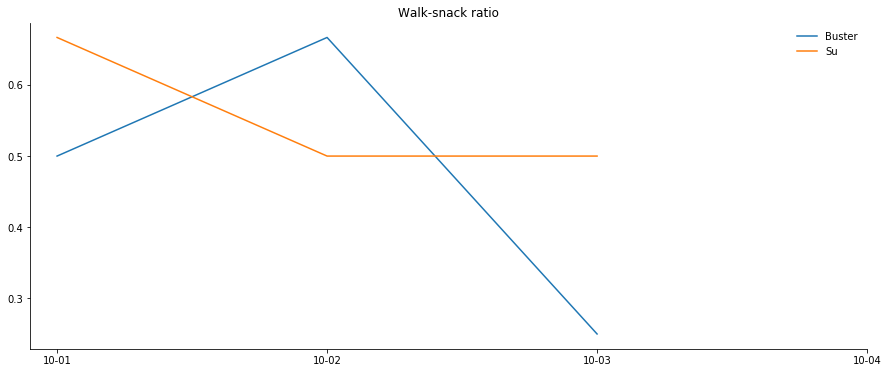

In [31]:
fig, ax = plt.subplots(figsize=(15,6))

# Here, I use xs to grab the walk-snack ratios for all the dogs and plot them
ax.plot(dogs_us.index, dogs_us.xs('ws_ratio', level=1, axis=1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Walk-snack ratio')

# Here I am formatting the x-axis dates
ax.set_xticks(dogs_us.index)                                  # put ticks only where we have observations
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))   #show the month and day


# The legend is more complicated...I bet there is a better way
# I use get_level_values to retrieve the column names at the dog level
# I use the unique() method to remove the duplicates
legend_labels = dogs_us.columns.get_level_values(level='dog').unique()
ax.legend(legend_labels, frameon=False)

plt.show()



### Stack
We can **stack the data** to put the variables back on the rows. 

When we unstack the data, pandas defaults to dropping the NaNs. We can override this if we choose. If we do not pass an argument, it stacks the innermost index. 

In [32]:
# stack just one level
dogs_s = dogs_us.stack()       # stack shifts the columns to rows. 
dogs_s

dog                    Buster        Su
time       var                         
2018-10-01 snacks    4.000000  3.000000
           walk      2.000000  2.000000
           ws_ratio  0.500000  0.666667
2018-10-02 snacks    3.000000  4.000000
           walk      2.000000  2.000000
           ws_ratio  0.666667  0.500000
2018-10-03 snacks    4.000000  4.000000
           walk      1.000000  2.000000
           ws_ratio  0.250000  0.500000
2018-10-04 snacks    5.000000  3.000000

In [87]:
# stack two levels (and keep the missings)
dogs_s = dogs_us.stack(['dog', 'var'], dropna=False)
dogs_s

time        dog     var     
2018-10-01  Buster  snacks      4.000000
                    walk        2.000000
                    ws_ratio    0.500000
            Su      snacks      3.000000
                    walk        2.000000
                    ws_ratio    0.666667
2018-10-02  Buster  snacks      3.000000
                    walk        2.000000
                    ws_ratio    0.666667
            Su      snacks      4.000000
                    walk        2.000000
                    ws_ratio    0.500000
2018-10-03  Buster  snacks      4.000000
                    walk        1.000000
                    ws_ratio    0.250000
            Su      snacks      4.000000
                    walk        2.000000
                    ws_ratio    0.500000
2018-10-04  Buster  snacks      5.000000
                    walk             NaN
                    ws_ratio         NaN
            Su      snacks      3.000000
                    walk             NaN
                    ws_ratio

The data are back to 'long' form. Note that we have series now, and not a DataFrame. 

I would like dog as the outermost index. Use the `swaplevel()` to swap two levels. 

In [34]:
dogs_s=dogs_s.swaplevel('dog', 'time')
dogs_s

dog     time        var     
Buster  2018-10-01  snacks      4.000000
                    walk        2.000000
                    ws_ratio    0.500000
Su      2018-10-01  snacks      3.000000
                    walk        2.000000
                    ws_ratio    0.666667
Buster  2018-10-02  snacks      3.000000
                    walk        2.000000
                    ws_ratio    0.666667
Su      2018-10-02  snacks      4.000000
                    walk        2.000000
                    ws_ratio    0.500000
Buster  2018-10-03  snacks      4.000000
                    walk        1.000000
                    ws_ratio    0.250000
Su      2018-10-03  snacks      4.000000
                    walk        2.000000
                    ws_ratio    0.500000
Buster  2018-10-04  snacks      5.000000
                    walk             NaN
                    ws_ratio         NaN
Su      2018-10-04  snacks      3.000000
                    walk             NaN
                    ws_ratio

In [35]:
# and swap var for time, so time is the innermost index
dogs_s=dogs_s.swaplevel('var', 'time')
dogs_s

dog     var       time      
Buster  snacks    2018-10-01    4.000000
        walk      2018-10-01    2.000000
        ws_ratio  2018-10-01    0.500000
Su      snacks    2018-10-01    3.000000
        walk      2018-10-01    2.000000
        ws_ratio  2018-10-01    0.666667
Buster  snacks    2018-10-02    3.000000
        walk      2018-10-02    2.000000
        ws_ratio  2018-10-02    0.666667
Su      snacks    2018-10-02    4.000000
        walk      2018-10-02    2.000000
        ws_ratio  2018-10-02    0.500000
Buster  snacks    2018-10-03    4.000000
        walk      2018-10-03    1.000000
        ws_ratio  2018-10-03    0.250000
Su      snacks    2018-10-03    4.000000
        walk      2018-10-03    2.000000
        ws_ratio  2018-10-03    0.500000
Buster  snacks    2018-10-04    5.000000
        walk      2018-10-04         NaN
        ws_ratio  2018-10-04         NaN
Su      snacks    2018-10-04    3.000000
        walk      2018-10-04         NaN
        ws_ratio  2018-10-04

In [36]:
# and give it a sorting...
dogs_s.sort_index(inplace=True)
dogs_s

dog     var       time      
Buster  snacks    2018-10-01    4.000000
                  2018-10-02    3.000000
                  2018-10-03    4.000000
                  2018-10-04    5.000000
        walk      2018-10-01    2.000000
                  2018-10-02    2.000000
                  2018-10-03    1.000000
                  2018-10-04         NaN
        ws_ratio  2018-10-01    0.500000
                  2018-10-02    0.666667
                  2018-10-03    0.250000
                  2018-10-04         NaN
Su      snacks    2018-10-01    3.000000
                  2018-10-02    4.000000
                  2018-10-03    4.000000
                  2018-10-04    3.000000
        walk      2018-10-01    2.000000
                  2018-10-02    2.000000
                  2018-10-03    2.000000
                  2018-10-04         NaN
        ws_ratio  2018-10-01    0.666667
                  2018-10-02    0.500000
                  2018-10-03    0.500000
                  2018-10-04

Let's get this ready to save as long data, like it was when we read it in.
1. Reset the index to move them back to columns
2. Give the value column a name

In [37]:
dogs_s = dogs_s.reset_index()
dogs_s

,dog,var,time,0
0,Buster,snacks,2018-10-01,4.000000
1,Buster,snacks,2018-10-02,3.000000
2,Buster,snacks,2018-10-03,4.000000
3,Buster,snacks,2018-10-04,5.000000
4,Buster,walk,2018-10-01,2.000000
5,Buster,walk,2018-10-02,2.000000
6,Buster,walk,2018-10-03,1.000000
7,Buster,walk,2018-10-04,NaN
8,Buster,ws_ratio,2018-10-01,0.500000
9,Buster,ws_ratio,2018-10-02,0.666667


In [38]:
dogs_s.rename(columns={0 :'value'}, inplace=True)
dogs_s

,dog,var,time,value
0,Buster,snacks,2018-10-01,4.000000
1,Buster,snacks,2018-10-02,3.000000
2,Buster,snacks,2018-10-03,4.000000
3,Buster,snacks,2018-10-04,5.000000
4,Buster,walk,2018-10-01,2.000000
5,Buster,walk,2018-10-02,2.000000
6,Buster,walk,2018-10-03,1.000000
7,Buster,walk,2018-10-04,NaN
8,Buster,ws_ratio,2018-10-01,0.500000
9,Buster,ws_ratio,2018-10-02,0.666667


In [39]:
# Now save it. 
dogs_s.to_csv('dog_data_updated.csv', index=False)  #index = False does not print the index

## Practice

Let's review multiIndexing with some real world data. The data are messy and will require some cleaning up and 'wrangling.' We will do some of it together, then I'll  hand it off for you all to finish. 

We will work with the IMF's [World Economic Outlook](https://www.imf.org/external/pubs/ft/weo/2017/02/weodata/download.aspx), which contains historical data and the IMF's forecasts for many countries and variables. 

Our **goal** is to study the evolution of debt in Germany, Argentina, and Greece. 

First, download the data file and open it in Excel. The file is here [http://www.imf.org/external/pubs/ft/weo/2016/02/weodata/WEOOct2016all.xls](http://www.imf.org/external/pubs/ft/weo/2016/02/weodata/WEOOct2016all.xls). Clicking on the link should initiate a download.

Wow, there is a lot going on here. Let's get to work.

### Read the data into a DataFrame
Read in the data, then inspect the head and tail to make sure it looks as expected.

In [40]:
# The IMF website is acting up and the url doesn't always work
# url = 'http://www.imf.org/external/pubs/ft/weo/2016/02/weodata/WEOOct2016all.xls'

# The data are in a tab-separated list (even though the file ends in 'xls'. not cool, IMF)
# The thousands parameter tells pandas to remove the comma when reading in numbers
weo = pd.read_csv('WEOOct2016all.xls', sep='\t', na_values=['n/a', '--'], thousands =',')
weo.head()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 1: invalid continuation byte

### A quick aside about encoding
What the heck just happened? What is a `UnicodeDecodeError`?

Any 'text' character (be it latin, cyrilic, korean, chinese,...) must be translated to a series of 0s and 1s in order for a computer to understand it. This translation is known as an encoding. As computers developed, many different groups created many different encodings (e.g., ASCII), so the letter 'K' may translate to 0010 in one encoding and 00100101 in another. What a mess. 

At some point [Unicode](https://en.wikipedia.org/wiki/Unicode) was developed to serve as one standard encoding. Pandas defaults to utf-8 encoding. The world is converging on unicode, but other encoding are still out there. 

The error message tells us that the IMF is not encoding its ~~workbook~~ tab-delimited file as utf-8. After a bit of digging, I found the file to be encoded in 'windows-1252'. (Now is not the time for a discussion of the bureaucratic nightmares of large international organizations, but this is a nice example.) 

That's probably more than you ever wanted to know about text, but it's a scary world out there. If you try reading a file and pandas throws a unicode error, then you probably need to change the encoding. 

The `read_` methods of pandas (and other python methods) takes a parameter `encoding` to specify the file encoding. When we do not specify the encoding, pandas defaults to utf-8. Let's add the encoding parameter and try again.

In [89]:
# url = 'http://www.imf.org/external/pubs/ft/weo/2016/02/weodata/WEOOct2016all.xls'

# The data are in a tab-separated list (even though the file ends in 'xls'. not cool, IMF)
# The encoding parameter tells pandas how to read special characters
# The thousands parameter tells pandas to remove the comma when reading in numbers
weo = pd.read_csv('WEOOct2016all.xls', sep='\t', na_values=['n/a', '--'], thousands =',', encoding='windows-1252')
weo.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,457.654,463.520,467.035,476.376,492.572,513.877,540.766,571.302,605.580,2014.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.933,1.282,0.758,2.000,3.400,4.325,5.233,5.647,6.000,2014.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1116.827,1167.905,1203.671,1283.049,1406.268,1569.305,1766.209,1995.217,2261.041,2014.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,20.170,20.352,19.687,18.395,19.290,20.604,22.297,24.222,26.392,2014.0
4,512,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",The GDP deflator is derived by dividing curren...,Index,NaN,"See notes for: Gross domestic product, consta...",NaN,...,244.033,251.964,257.726,269.336,285.495,305.385,326.613,349.240,373.368,2014.0


In [90]:
weo.tail()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
8400,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,NaN,See notes for: General government gross debt ...,NaN,...,54.559,55.273,58.899,58.859,57.587,57.056,58.202,56.637,58.524,2014.0
8401,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,13.490,14.197,14.170,14.193,14.556,15.025,15.525,16.072,16.661,2014.0
8402,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,-2.461,-2.156,-1.520,-1.069,-0.893,-1.370,-1.424,-1.500,-1.599,2013.0
8403,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,-18.242,-15.186,-10.729,-7.534,-6.132,-9.122,-9.172,-9.331,-9.600,2013.0
8404,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data file has a footer (go back and look in the file) and we read it in as a line of data. We could go back and specify the `skipfooter` parameter to `read_csv()`, but we can also just drop it.

In [91]:
weo.drop(8404, inplace=True)   # Using the row number is not very robust. What if the IMF add more countries to the workbook?
weo.tail()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
8399,698,ZWE,GGXWDG,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,7.360,7.847,8.346,8.354,8.382,8.572,9.036,9.103,9.751,2014.0
8400,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,NaN,See notes for: General government gross debt ...,NaN,...,54.559,55.273,58.899,58.859,57.587,57.056,58.202,56.637,58.524,2014.0
8401,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,13.490,14.197,14.170,14.193,14.556,15.025,15.525,16.072,16.661,2014.0
8402,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,-2.461,-2.156,-1.520,-1.069,-0.893,-1.370,-1.424,-1.500,-1.599,2013.0
8403,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,-18.242,-15.186,-10.729,-7.534,-6.132,-9.122,-9.172,-9.331,-9.600,2013.0


### Drop unneeded variables
Use `drop()` to get rid of columns that we are not going to use.

In [92]:
weo.drop(['WEO Country Code', 'Subject Notes', 'Country/Series-specific Notes', 'Scale', 'Estimates Start After'],axis=1, inplace=True)
weo.head()

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,NaN,NaN,NaN,NaN,NaN,...,440.336,457.654,463.520,467.035,476.376,492.572,513.877,540.766,571.302,605.580
1,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,NaN,...,13.968,3.933,1.282,0.758,2.000,3.400,4.325,5.233,5.647,6.000
2,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,NaN,NaN,NaN,NaN,NaN,...,1033.591,1116.827,1167.905,1203.671,1283.049,1406.268,1569.305,1766.209,1995.217,2261.041
3,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,...,20.296,20.170,20.352,19.687,18.395,19.290,20.604,22.297,24.222,26.392
4,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",Index,NaN,NaN,NaN,NaN,NaN,...,234.728,244.033,251.964,257.726,269.336,285.495,305.385,326.613,349.240,373.368


### Keep the countries and variables we want
Let's look at Argentina, Germany, and Greece and the variables debt-gdp ratio and deficit-gdp ratio. 

In [93]:
variables = ['GGXWDG_NGDP', 'GGXCNL_NGDP']
countries = ['ARG', 'DEU', 'GRC']

weo = weo[ weo['WEO Subject Code'].isin(variables) & weo['ISO'].isin(countries) ]
weo.head()

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
252,ARG,GGXCNL_NGDP,Argentina,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-2.802,-3.001,-3.990,-6.630,-7.123,-7.383,-6.579,-5.450,-4.307,-4.149
260,ARG,GGXWDG_NGDP,Argentina,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,39.434,42.195,43.587,52.131,51.751,50.716,51.199,50.495,49.322,48.860
2716,DEU,GGXCNL_NGDP,Germany,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-0.050,-0.203,0.278,0.745,0.129,0.132,0.234,0.427,0.523,0.590
2724,DEU,GGXWDG_NGDP,Germany,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,79.516,77.058,74.480,70.988,68.169,65.948,63.601,61.120,58.905,56.676
2804,GRC,GGXCNL_NGDP,Greece,General government net lending/borrowing,Percent of GDP,-2.774,-7.847,-6.092,-6.847,-7.976,...,-6.506,-3.531,-4.054,-3.080,-3.359,-2.721,-1.690,-1.716,-1.997,-2.585


### The isin() method
Check out the way that I selected the rows of the DataFrame I wanted. I used the `isin()` method ([docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html)). You pass it a list of values and it returns a DataFrame of bools which you use to subset the data. This is a lot cleaner than using a bunch of conditional statements.  

I'm using it twice: once to specify the variables I want and once to specify the countries I want. I join the two together with an & operator.  

### Your turn
The data are in pretty decent shape. Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

1. Rename the 'WEO Subject Code' to 'Variable' and 'Subject Descriptor' to 'Description'.

In [94]:
weo.rename(columns = {"WEO Subject Code":"Variable", "Subject Descriptor":"Description"}, inplace = True)
weo.head()

,ISO,Variable,Country,Description,Units,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
252,ARG,GGXCNL_NGDP,Argentina,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-2.802,-3.001,-3.990,-6.630,-7.123,-7.383,-6.579,-5.450,-4.307,-4.149
260,ARG,GGXWDG_NGDP,Argentina,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,39.434,42.195,43.587,52.131,51.751,50.716,51.199,50.495,49.322,48.860
2716,DEU,GGXCNL_NGDP,Germany,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-0.050,-0.203,0.278,0.745,0.129,0.132,0.234,0.427,0.523,0.590
2724,DEU,GGXWDG_NGDP,Germany,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,79.516,77.058,74.480,70.988,68.169,65.948,63.601,61.120,58.905,56.676
2804,GRC,GGXCNL_NGDP,Greece,General government net lending/borrowing,Percent of GDP,-2.774,-7.847,-6.092,-6.847,-7.976,...,-6.506,-3.531,-4.054,-3.080,-3.359,-2.721,-1.690,-1.716,-1.997,-2.585


2. Replace 'GGXCNL_NGDP' with 'Surplus
3. Replace 'GGXWDG_NGDP' with 'Debt'

In [96]:
weo.replace({"GGXCNL_NGDP":"Surplus", "GGXWDG_NGDP":"Debt"}, inplace = True)
weo.head()

,ISO,Variable,Country,Description,Units,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
252,ARG,Surplus,Argentina,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-2.802,-3.001,-3.990,-6.630,-7.123,-7.383,-6.579,-5.450,-4.307,-4.149
260,ARG,Debt,Argentina,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,39.434,42.195,43.587,52.131,51.751,50.716,51.199,50.495,49.322,48.860
2716,DEU,Surplus,Germany,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-0.050,-0.203,0.278,0.745,0.129,0.132,0.234,0.427,0.523,0.590
2724,DEU,Debt,Germany,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,79.516,77.058,74.480,70.988,68.169,65.948,63.601,61.120,58.905,56.676
2804,GRC,Surplus,Greece,General government net lending/borrowing,Percent of GDP,-2.774,-7.847,-6.092,-6.847,-7.976,...,-6.506,-3.531,-4.054,-3.080,-3.359,-2.721,-1.690,-1.716,-1.997,-2.585


In [88]:
weo.replace?

4. Set the (row) multiIndex to be 'ISO', 'Variable', 'Country', 'Description', and 'Units', in that order. 

In [48]:
weo.set_index(["ISO", "Variable", "Country", "Description", "Units"], inplace = True)
weo.head()

1980  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt            Percent of GDP    NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP    NaN   
    Debt     Germany   General government gross debt            Percent of GDP    NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -2.774   

                                                                                 1981  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt            Percent of GDP    NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP    NaN   
    Debt     Germany   General government gross debt            Percent of GDP    NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -7.847   

                                                                                 1982  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt            Percent of GDP    NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP    NaN   
    Debt     Germany   General government gross debt            Percent of GDP    NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -6.092   

                                                                                 1983  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt            Percent of GDP    NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP    NaN   
    Debt     Germany   General government gross debt            Percent of GDP    NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -6.847   

                                                                                 1984  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt            Percent of GDP    NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP    NaN   
    Debt     Germany   General government gross debt            Percent of GDP    NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -7.976   

                                                                                  1985  \
ISO Variable Country   Description                              Units                    
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP     NaN   
    Debt     Argentina General government gross debt            Percent of GDP     NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP     NaN   
    Debt     Germany   General government gross debt            Percent of GDP     NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -10.603   

                                                                                 1986  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt           

5. We want the row to be time and everything else to be columns. Swap the columns for rows.
6. Sort the row and column indexes.

In [49]:
weo = weo.transpose()
weo.sort_index(axis = 0, inplace = True)
weo.sort_index(axis = 1, inplace = True)
weo.tail()

ISO                                   ARG  \
Variable                             Debt   
Country                         Argentina   
Description General government gross debt   
Units                      Percent of GDP   
2017                               50.716   
2018                               51.199   
2019                               50.495   
2020                               49.322   
2021                               48.860   

ISO                                                   \
Variable                                     Surplus   
Country                                    Argentina   
Description General government net lending/borrowing   
Units                                 Percent of GDP   
2017                                          -7.383   
2018                                          -6.579   
2019                                          -5.450   
2020                                          -4.307   
2021                                          -4.149   

ISO                                   DEU  \
Variable                             Debt   
Country                           Germany   
Description General government gross debt   
Units                      Percent of GDP   
2017                               65.948   
2018                               63.601   
2019                               61.120   
2020                               58.905   
2021                               56.676   

ISO                                                   \
Variable                                     Surplus   
Country                                      Germany   
Description General government net lending/borrowing   
Units                                 Percent of GDP   
2017                                           0.132   
2018                                           0.234   
2019                                           0.427   
2020                                           0.523   
2021                                           0.590   

ISO                                   GRC  \
Variable                             Debt   
Country                            Greece   
Description General government gross debt   
Units                      Percent of GDP   
2017                              184.741   
2018                              184.745   
2019                              178.539   
2020                              173.087   
2021                              169.165   

ISO                                                   
Variable                                     Surplus  
Country                                       Greece  
Description General government net lending/borrowing  
Units                                 Percent of GDP  
2017                                          -2.721  
2018                                          -1.690  
2019                                          -1.716  
2020                                          -1.997  
2021                                          -2.585

7. Plot debt levels for Argentina, Germany and Greece for all the years in the data. Add a legend. Make the figure look nice. Hint: The x-axis is time...

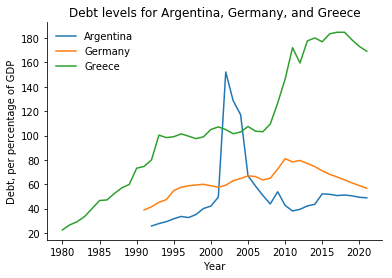

In [70]:
fig, ax = plt.subplots()

ax.plot(weo.loc[:, "ARG"].Debt, label = "Argentina")
ax.plot(weo.loc[:, "DEU"].Debt, label = "Germany")
ax.plot(weo.loc[:, "GRC"].Debt, label = "Greece")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title("Debt levels for Argentina, Germany, and Greece")
ax.set_xlabel("Year")
ax.set_ylabel("Debt, per percentage of GDP")

ax.legend(frameon = False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()

Wow, Greece has had an interesting run. Let's look at Greece more closely. 
8. Create a (2,1) grid of subplots. Plot Greece's surplus in the top axes and debt in the bottom axis. Make it look nice.

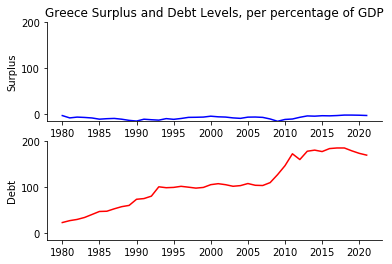

In [86]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(weo.loc[:, "GRC"].Surplus, color = "blue")
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].set_title("Greece Surplus and Debt Levels, per percentage of GDP")
ax[0].set_ylabel("Surplus")
ax[0].set_ylim(-15, 200)

ax[1].plot(weo.loc[:, "GRC"].Debt, color = "red")
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].set_ylabel("Debt")
ax[1].set_ylim(-15, 200)

plt.show()